# 关联 （Correlation）

## 散点图（Scatter plot）

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385


<Figure size 800x400 with 0 Axes>

[(0, 90000), Text(0, 0.5, 'Population'), (0.0, 0.1), Text(0.5, 0, 'Area')]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Scatterplot of Midwest Area vs Population')

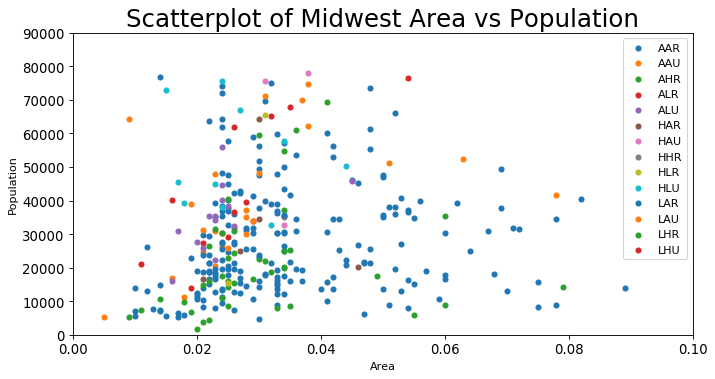

In [1]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest[:3]
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, cmap=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=10) 

## 带边界的气泡图（Bubble plot with Encircling）

[(0, 90000), Text(0, 0.5, 'Population'), (0.0, 0.1), Text(0.5, 0, 'Area')]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Bubble Plot with Encircling')

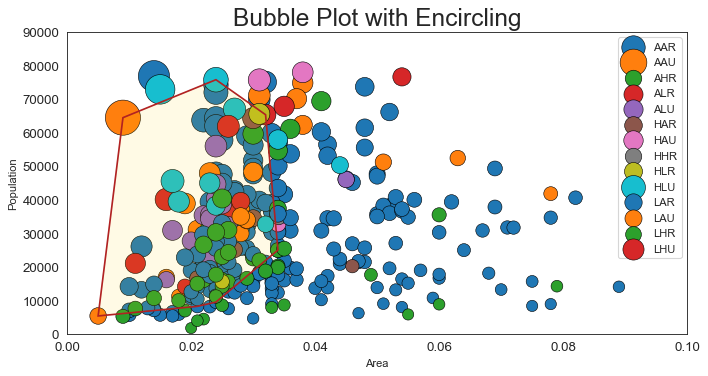

In [2]:
from scipy.spatial import ConvexHull
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], 
                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p) #计算凸点
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=10)    

## 带线性回归最佳拟合线的散点图 （Scatter plot with linear regression line of best fit）

Text(0.5, 1, 'Scatterplot with line of best fit grouped by number of cylinders')

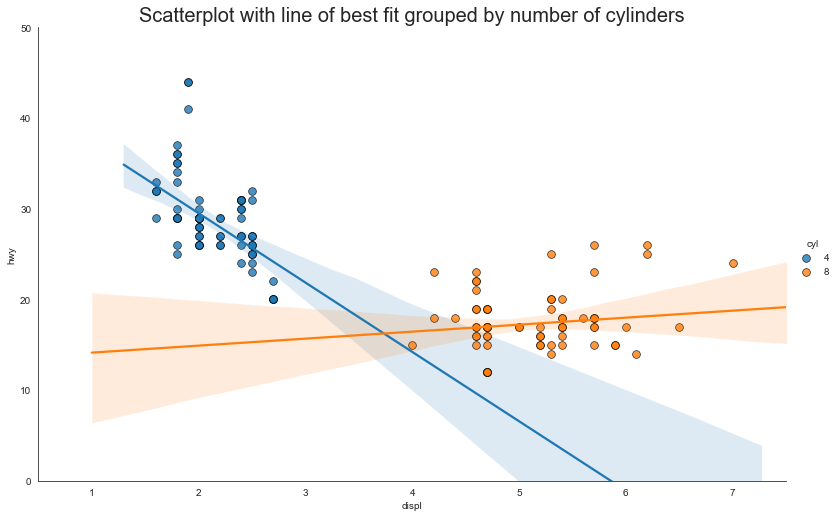

In [3]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

## 抖动图 （Jittering with stripplot）
通常，多个数据点具有完全相同的 X 和 Y 值。 结果，多个点绘制会重叠并隐藏。 为避免这种情况，请将数据点稍微抖动，以便您可以直观地看到它们。 使用 seaborn 的 `stripplot（）` 很方便实现这个功能。

Text(0.5, 1.0, 'Use jittered plots to avoid overlapping of points')

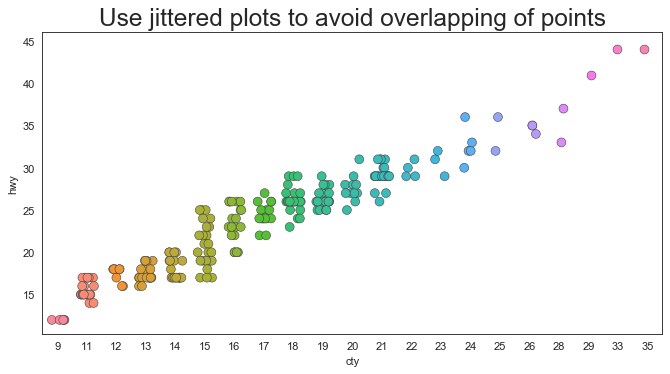

In [4]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(10,5), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)

## 计数图 （Counts Plot）

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10


Text(0.5, 1.0, 'Counts Plot - Size of circle is bigger as more points overlap')

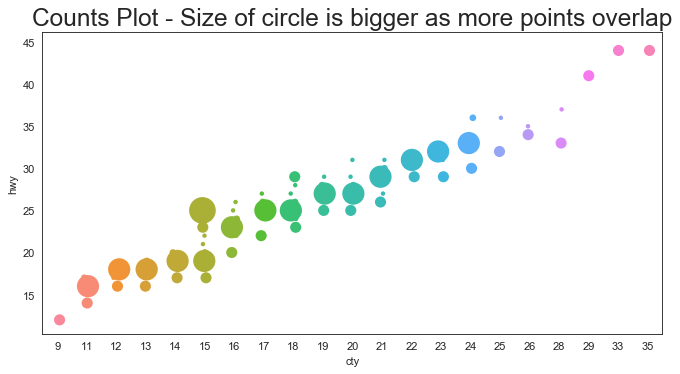

In [5]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts[:3]
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 5), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)

## 边缘直方图 （Marginal Histogram）

(array([ 5., 14., 24.,  0.,  6., 13., 20.,  0., 18.,  0.,  8.,  6.,  9.,
         4.,  7.,  3.,  8., 18.,  0.,  4.,  1.,  0., 28.,  0.,  0.,  2.,
         5.,  6.,  8.,  1.,  8.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,
         1.]),
 array([1.6  , 1.735, 1.87 , 2.005, 2.14 , 2.275, 2.41 , 2.545, 2.68 ,
        2.815, 2.95 , 3.085, 3.22 , 3.355, 3.49 , 3.625, 3.76 , 3.895,
        4.03 , 4.165, 4.3  , 4.435, 4.57 , 4.705, 4.84 , 4.975, 5.11 ,
        5.245, 5.38 , 5.515, 5.65 , 5.785, 5.92 , 6.055, 6.19 , 6.325,
        6.46 , 6.595, 6.73 , 6.865, 7.   ]),
 <a list of 1 Patch objects>)

(array([ 5.,  0.,  2., 10.,  0.,  7., 31., 10., 13.,  0., 11.,  2.,  7.,
         7.,  0., 13., 15., 32., 14.,  0.,  7., 22.,  4.,  7.,  0.,  4.,
         2.,  1.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         2.]),
 array([12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8, 17.6, 18.4, 19.2, 20. ,
        20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6, 26.4, 27.2, 28. , 28.8,
        29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4, 35.2, 36. , 36.8, 37.6,
        38.4, 39.2, 40. , 40.8, 41.6, 42.4, 43.2, 44. ]),
 <a list of 1 Patch objects>)

[Text(0, 0.5, 'hwy'),
 Text(0.5, 0, 'displ'),
 Text(0.5, 1.0, 'Scatterplot with Histograms \n displ vs hwy')]

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0')]

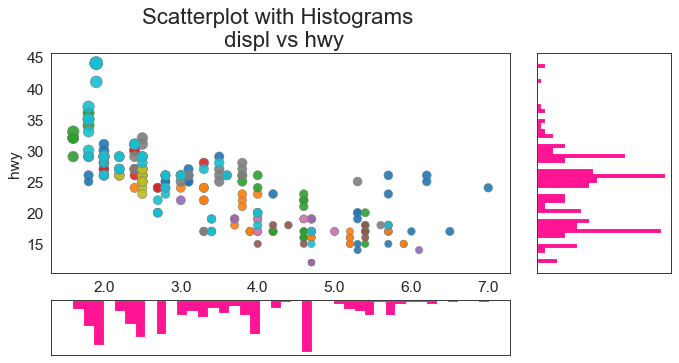

In [6]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 5), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)

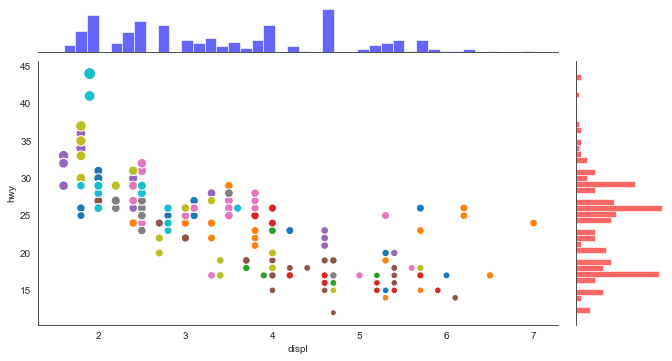

In [7]:
g = sns.JointGrid(x="displ", y="hwy", data=df)
g = g.plot_joint(plt.scatter, cmap=plt.cm.tab10, edgecolor="white", s=df.cty*4, c=np.linspace(0, 1, 234))
_ = g.ax_marg_x.hist(df["displ"], color="b", alpha=.6, bins=40)
_ = g.ax_marg_y.hist(df["hwy"], color="r", alpha=.6, orientation="horizontal", bins=40)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

## 边缘箱形图 （Marginal Boxplot)

[Text(0.5, 0, '')]

[Text(0, 0.5, '')]

[Text(0, 0.5, 'hwy'),
 Text(0.5, 0, 'displ'),
 Text(0.5, 1.0, 'Scatterplot with Histograms \n displ vs hwy')]

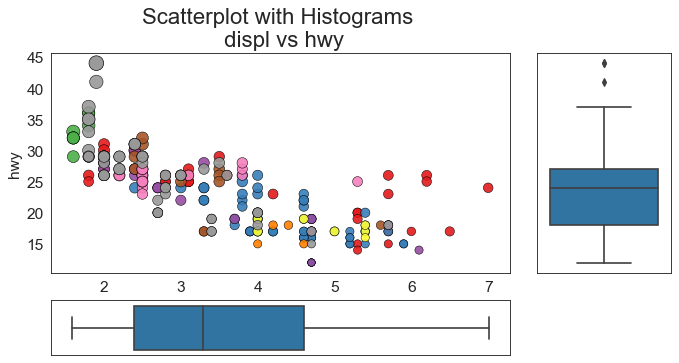

In [8]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 5), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

{'whiskers': [<matplotlib.lines.Line2D at 0x198c7e1b7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x198c7e13708>,
 'boxes': [<matplotlib.lines.Line2D at 0x198c7dfa1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x198c7e13908>],
 'fliers': [<matplotlib.lines.Line2D at 0x198c7e27588>],
 'means': [<matplotlib.lines.Line2D at 0x198c7e27d88>]}

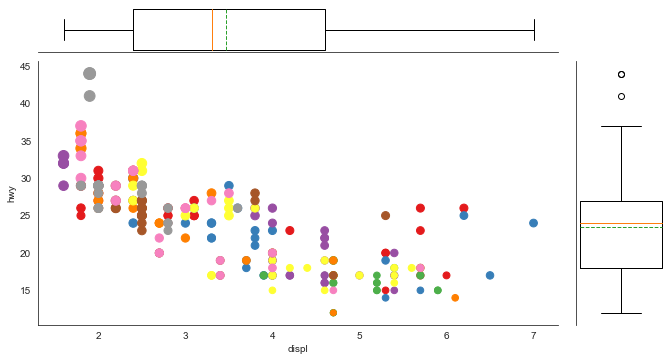

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
g = sns.JointGrid(x='displ', y='hwy', data=df)
g = g.plot_joint(plt.scatter, c=np.linspace(0, 1, 234), cmap=plt.cm.Set1, s=df.cty*4)
ax1 = g.ax_marg_x.boxplot(df['displ'], vert=False, showmeans=True, meanline=True, widths=2)
# ax1['means'][0].set_color('red')
g.ax_marg_y.boxplot(df['hwy'], vert=True, showmeans=True, meanline=True, widths=2)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

## 相关图 （Correllogram)

<Figure size 800x400 with 0 Axes>

Text(0.5, 1, 'Correlogram of mtcars')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text yticklabel objects>)

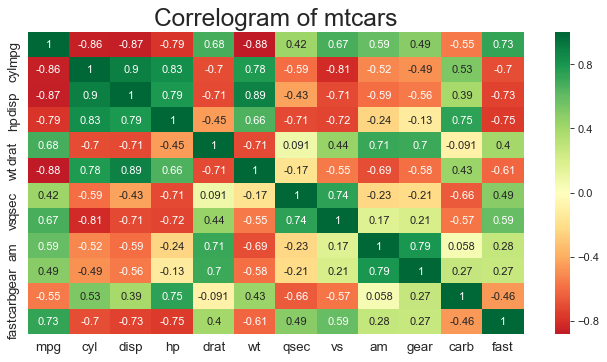

In [10]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(10, 5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 矩阵图 （Pairwise Plot）

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

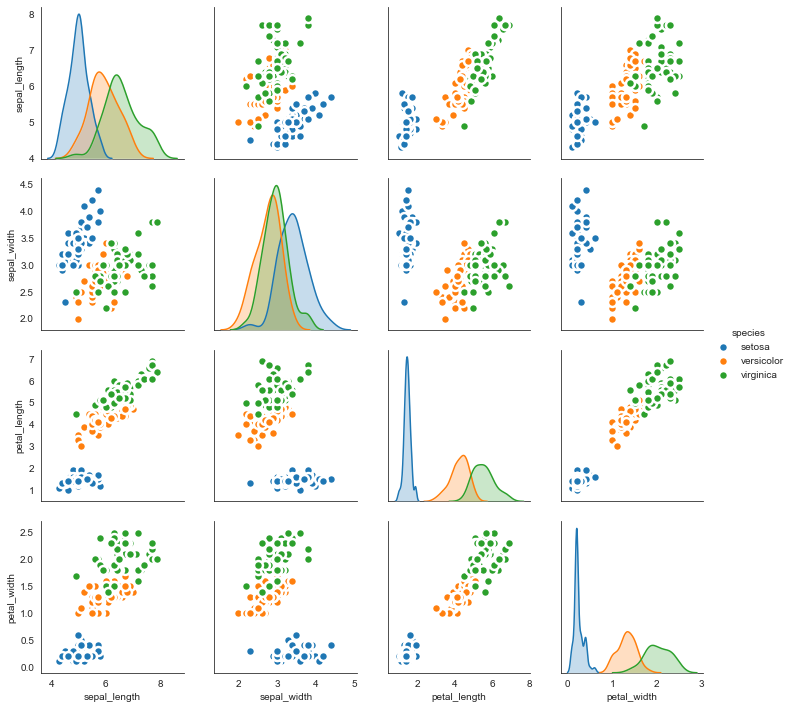

In [14]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

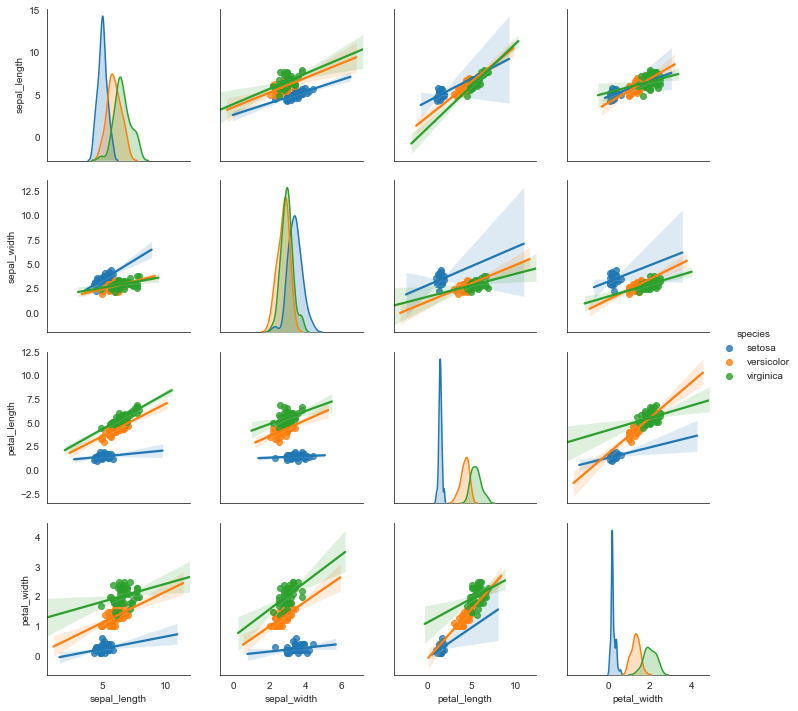

In [15]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")

#  偏差 （Deviation）

## 发散型条形图 （Diverging Bars

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


<Figure size 1120x800 with 0 Axes>

[Text(0, 0.5, '$Model$'), Text(0.5, 0, '$Mileage$')]

([<matplotlib.axis.YTick at 0x19647777c08>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Bars of Car Mileage')

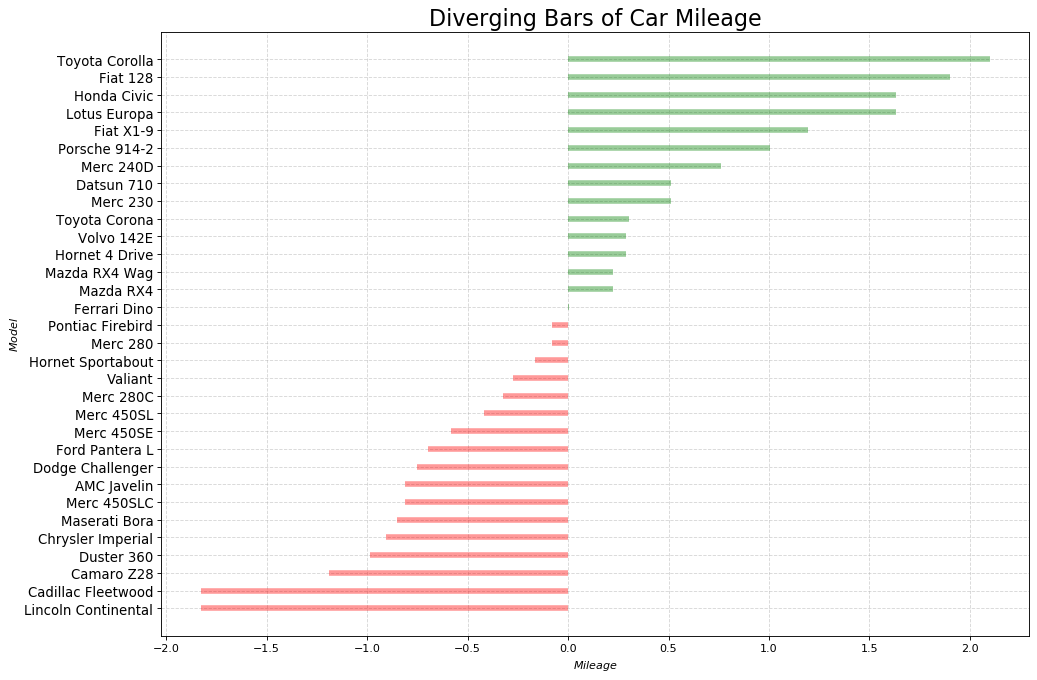

In [4]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df[:5]

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

## 发散型文本 （Diverging Texts）

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


<Figure size 1120x1120 with 0 Axes>

([<matplotlib.axis.YTick at 0x19649ebd188>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Text Bars of Car Mileage')

(-2.5, 2.5)

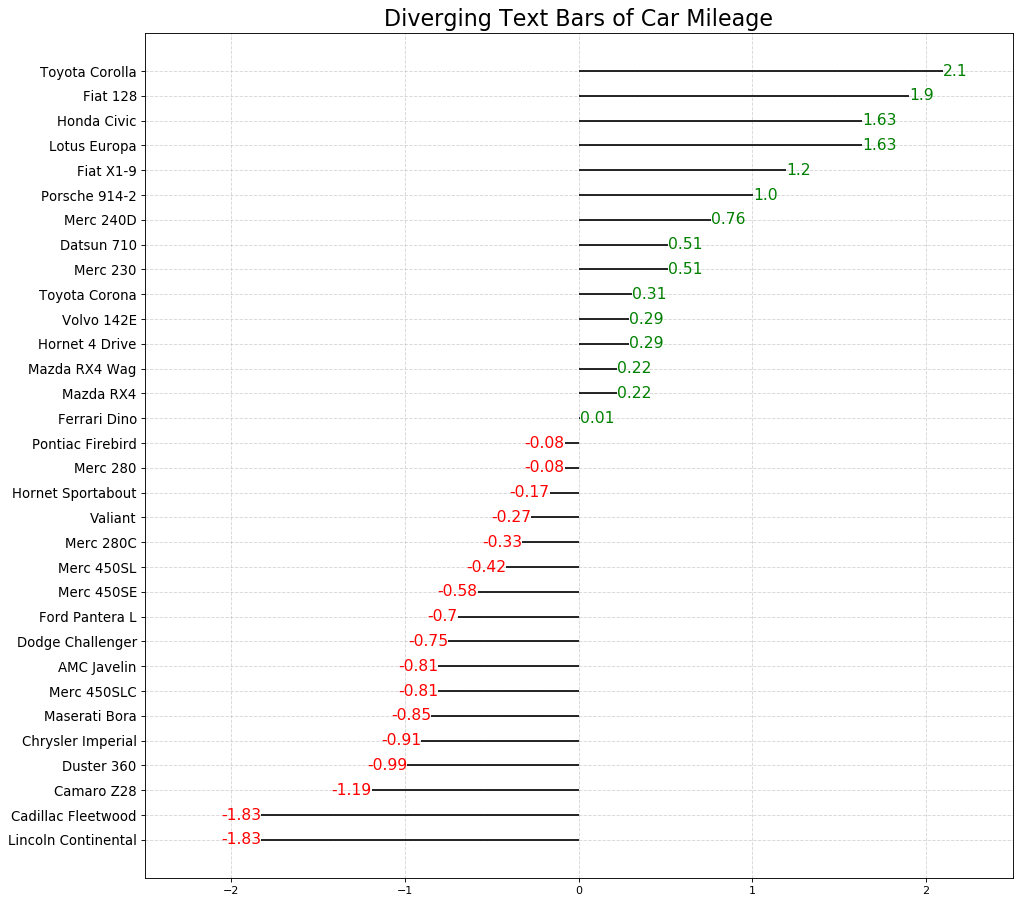

In [6]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df[:5]

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 发散型包点图 （Diverging Dot Plot）

<Figure size 1120x1280 with 0 Axes>

([<matplotlib.axis.YTick at 0x19649a9a8c8>,
 <a list of 32 Text yticklabel objects>)

Text(0.5, 1.0, 'Diverging Dotplot of Car Mileage')

Text(0.5, 0, '$Mileage$')

(-2.5, 2.5)

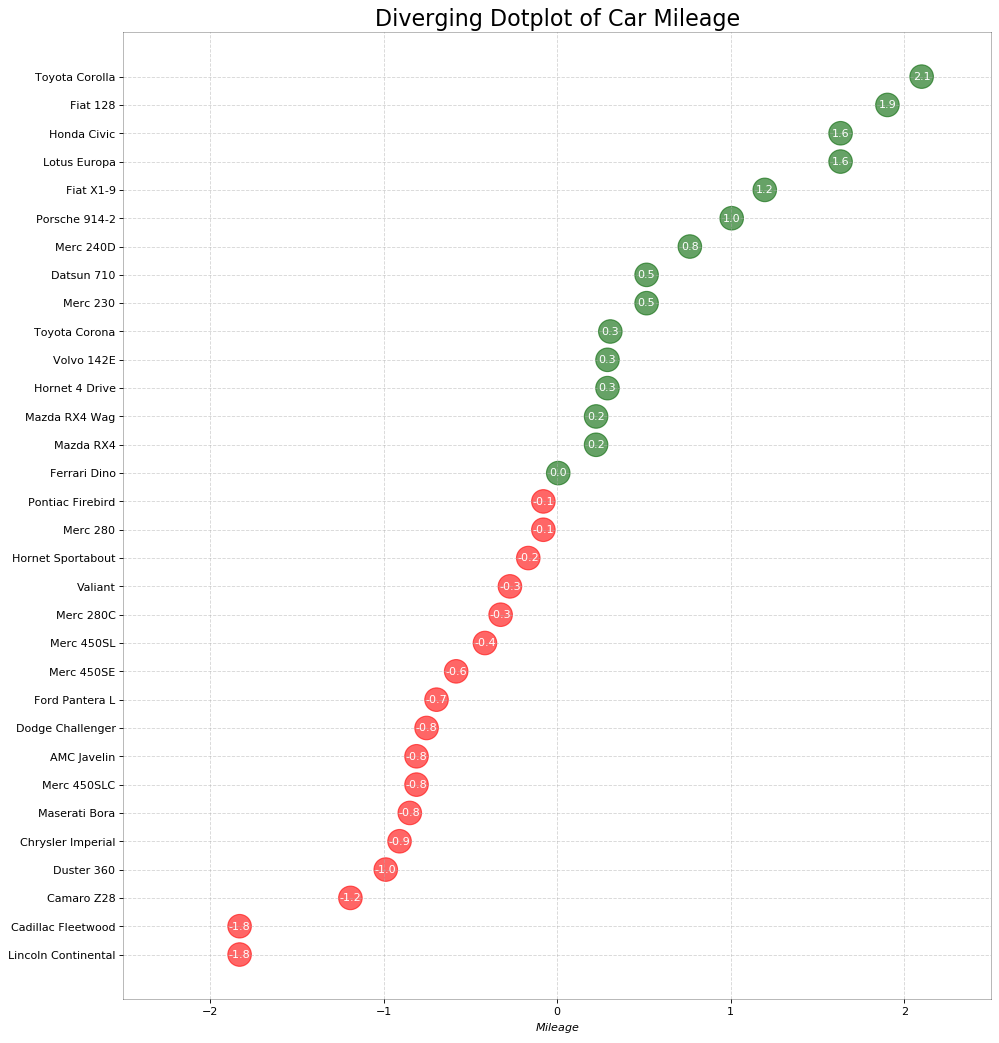

In [7]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

## 带标记的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）

<Figure size 1120x1280 with 0 Axes>

([<matplotlib.axis.YTick at 0x19647c05908>,
 <a list of 32 Text yticklabel objects>)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 11 Text xticklabel objects>)

Text(1.0, 11, 'Mercedes Models')

Text(0.5, 1.0, 'Diverging Bars of Car Mileage')

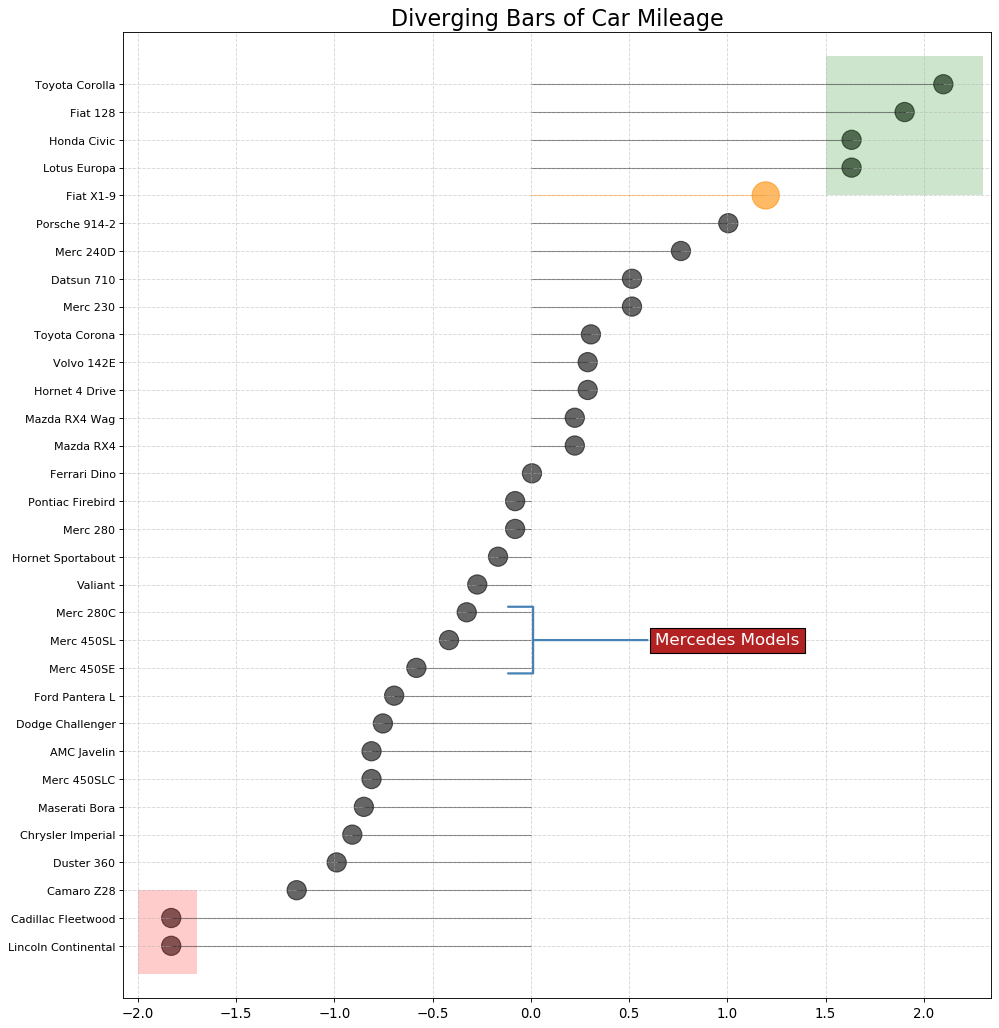

In [12]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), 
             color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 面积图 （Area Chart）

<Figure size 1280x800 with 0 Axes>

Text(88.0, 28, 'Peak \n1975')

[Text(0, 0, 'JUL-1967'),
 Text(0, 0, 'JAN-1968'),
 Text(0, 0, 'JUL-1968'),
 Text(0, 0, 'JAN-1969'),
 Text(0, 0, 'JUL-1969'),
 Text(0, 0, 'JAN-1970'),
 Text(0, 0, 'JUL-1970'),
 Text(0, 0, 'JAN-1971'),
 Text(0, 0, 'JUL-1971'),
 Text(0, 0, 'JAN-1972'),
 Text(0, 0, 'JUL-1972'),
 Text(0, 0, 'JAN-1973'),
 Text(0, 0, 'JUL-1973'),
 Text(0, 0, 'JAN-1974'),
 Text(0, 0, 'JUL-1974'),
 Text(0, 0, 'JAN-1975'),
 Text(0, 0, 'JUL-1975')]

(-35, 35)

(1, 100)

Text(0.5, 1.0, 'Month Economics Return %')

Text(0, 0.5, 'Monthly returns %')

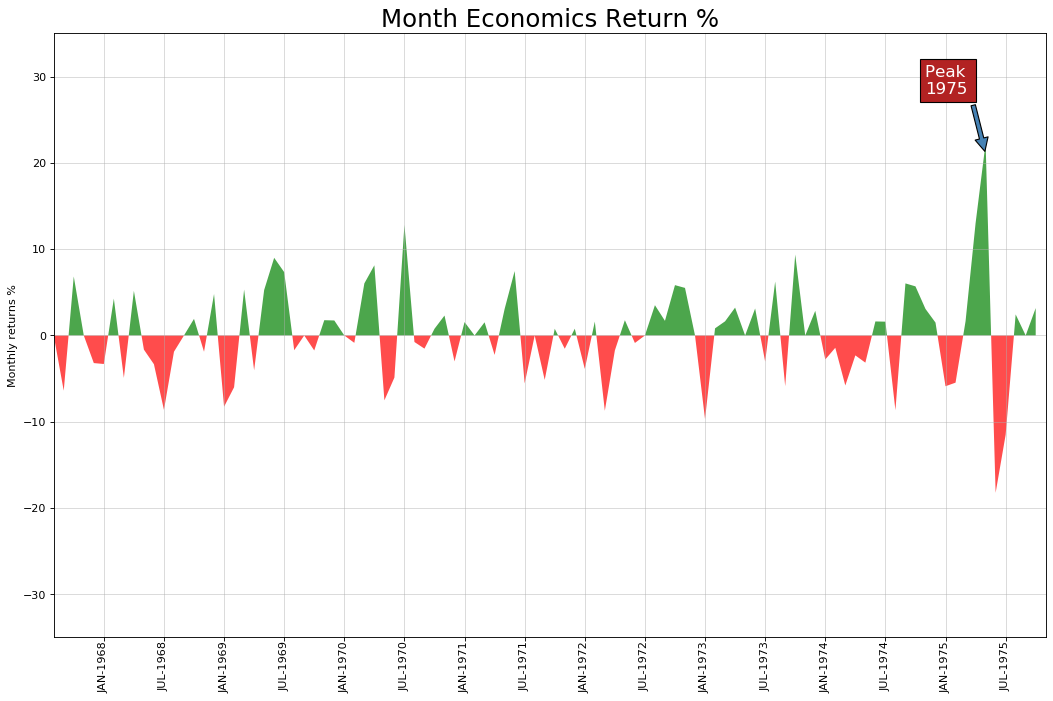

In [14]:
import numpy as np
import pandas as pd

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

# 排序 （Ranking）

## 有序条形图 （Ordered Bar Chart）

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135


Text(0, 11.833333333333334, '11.3')

Text(1, 12.0, '11.5')

Text(2, 13.635135135135135, '13.1')

Text(3, 13.75, '13.2')

Text(4, 14.0, '13.5')

Text(5, 14.5, '14.0')

Text(6, 15.5, '15.0')

Text(7, 17.5, '17.0')

Text(8, 18.11111111111111, '17.6')

Text(9, 18.576923076923077, '18.1')

Text(10, 19.029411764705884, '18.5')

Text(11, 19.142857142857142, '18.6')

Text(12, 19.785714285714285, '19.3')

Text(13, 21.425925925925927, '20.9')

Text(14, 24.944444444444443, '24.4')

Text(0.5, 1.0, 'Bar Chart for Highway Mileage')

[(0, 30), Text(0, 0.5, 'Miles Per Gallon')]

([<matplotlib.axis.XTick at 0x19649da63c8>,
 <a list of 15 Text xticklabel objects>)

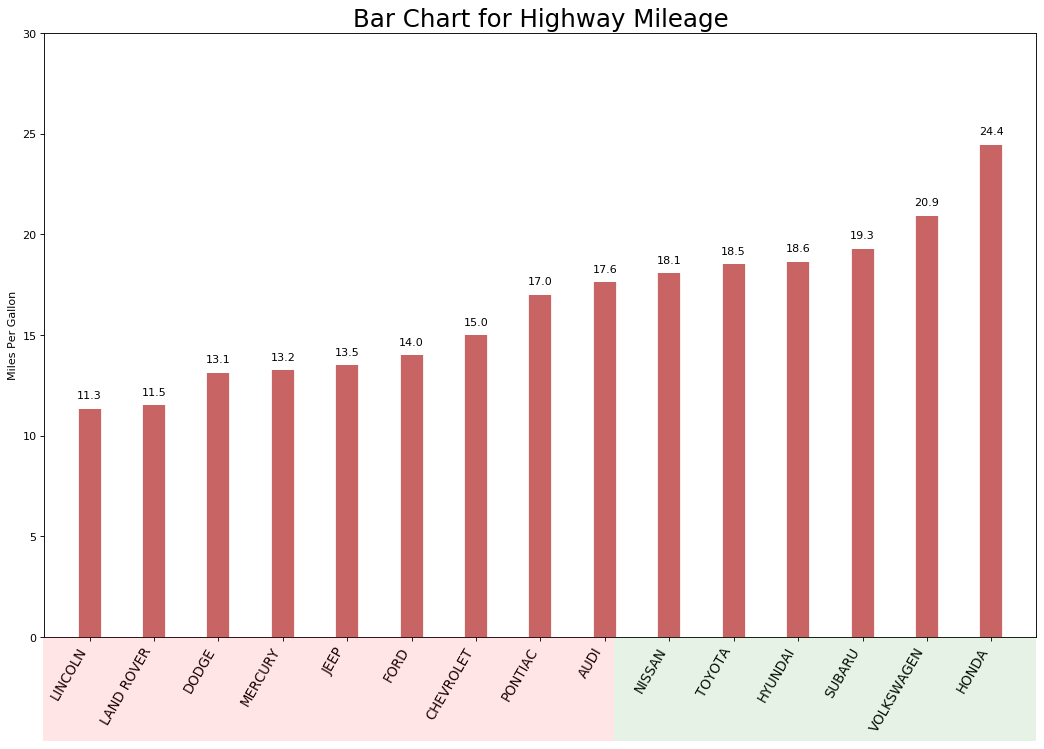

In [20]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df[:3]

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

## 棒棒糖图 （Lollipop Chart） 

Text(0.5, 1.0, 'Lollipop Chart for Highway Mileage')

Text(0, 0.5, 'Miles Per Gallon')

[Text(0, 0, 'LINCOLN'),
 Text(0, 0, 'LAND ROVER'),
 Text(0, 0, 'DODGE'),
 Text(0, 0, 'MERCURY'),
 Text(0, 0, 'JEEP'),
 Text(0, 0, 'FORD'),
 Text(0, 0, 'CHEVROLET'),
 Text(0, 0, 'PONTIAC'),
 Text(0, 0, 'AUDI'),
 Text(0, 0, 'NISSAN'),
 Text(0, 0, 'TOYOTA'),
 Text(0, 0, 'HYUNDAI'),
 Text(0, 0, 'SUBARU'),
 Text(0, 0, 'VOLKSWAGEN'),
 Text(0, 0, 'HONDA')]

(0, 30)

Text(0, 11.833333333333334, '11.33')

Text(1, 12.0, '11.5')

Text(2, 13.635135135135135, '13.14')

Text(3, 13.75, '13.25')

Text(4, 14.0, '13.5')

Text(5, 14.5, '14.0')

Text(6, 15.5, '15.0')

Text(7, 17.5, '17.0')

Text(8, 18.11111111111111, '17.61')

Text(9, 18.576923076923077, '18.08')

Text(10, 19.029411764705884, '18.53')

Text(11, 19.142857142857142, '18.64')

Text(12, 19.785714285714285, '19.29')

Text(13, 21.425925925925927, '20.93')

Text(14, 24.944444444444443, '24.44')

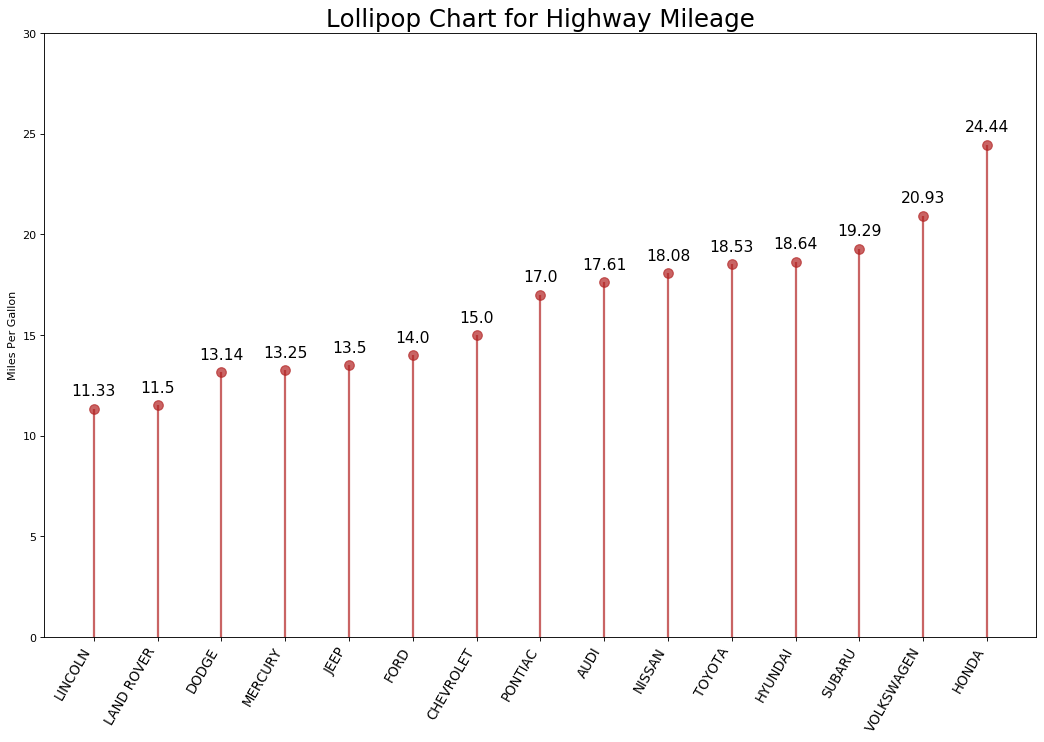

In [21]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

## 包点图 （Dot Plot）

Text(0.5, 1.0, 'Dot Plot for Highway Mileage')

Text(0.5, 0, 'Miles Per Gallon')

[Text(0, 0, 'Lincoln'),
 Text(0, 0, 'Land Rover'),
 Text(0, 0, 'Dodge'),
 Text(0, 0, 'Mercury'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Pontiac'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Honda')]

(10, 27)

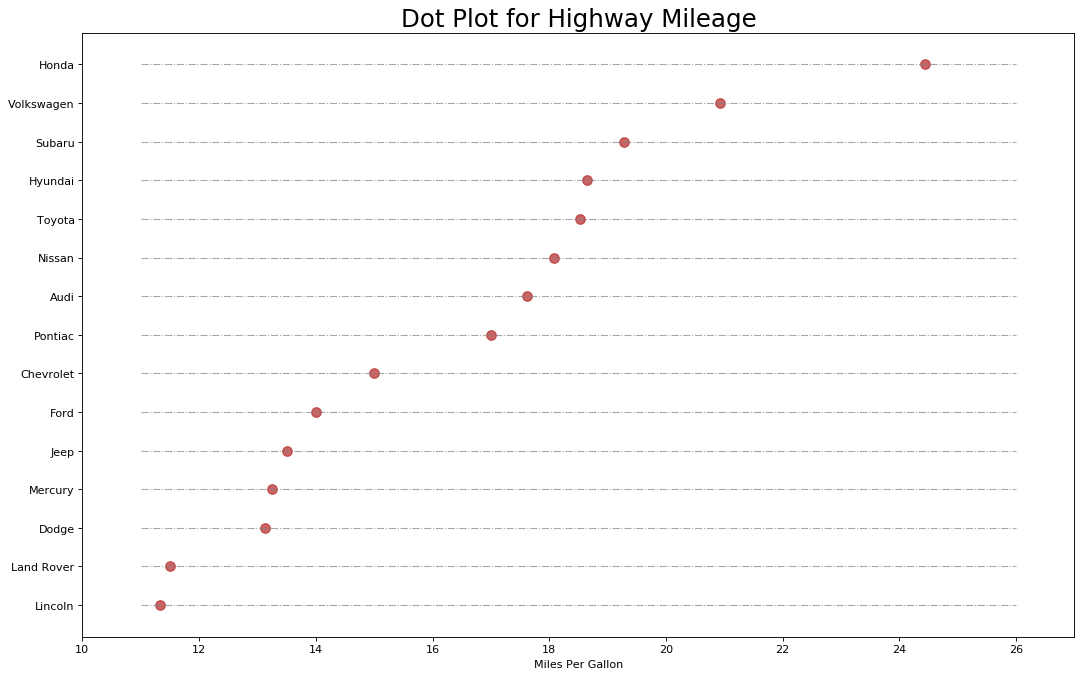

In [22]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

## 坡度图 （Slope Chart）

Text(0.95, 1252.57246582115, 'Africa, 1253')

Text(3.05, 1385.2360622557699, 'Africa, 1385')

Text(0.95, 4079.0625522, 'Americas, 4079')

Text(3.05, 4616.04373316, 'Americas, 4616')

Text(0.95, 5195.484004039389, 'Asia, 5195')

Text(3.05, 4003.13293994242, 'Asia, 4003')

Text(0.95, 5661.05743476, 'Europe, 5661')

Text(3.05, 6963.01281593333, 'Europe, 6963')

Text(0.95, 10298.08565, 'Oceania, 10298')

Text(3.05, 11598.522455, 'Oceania, 11599')

Text(0.95, 13000, 'BEFORE')

Text(3.05, 13000, 'AFTER')

Text(0.5, 1.0, 'Slopechart: Comparing GDP Per Capita between 1952 vs 1957')

[(0, 14000), Text(0, 0.5, 'Mean GDP Per Capita'), (0, 4)]

[Text(0, 0, '1952'), Text(0, 0, '1957')]

([<matplotlib.axis.YTick at 0x1964a3c9b48>,
 <a list of 7 Text yticklabel objects>)

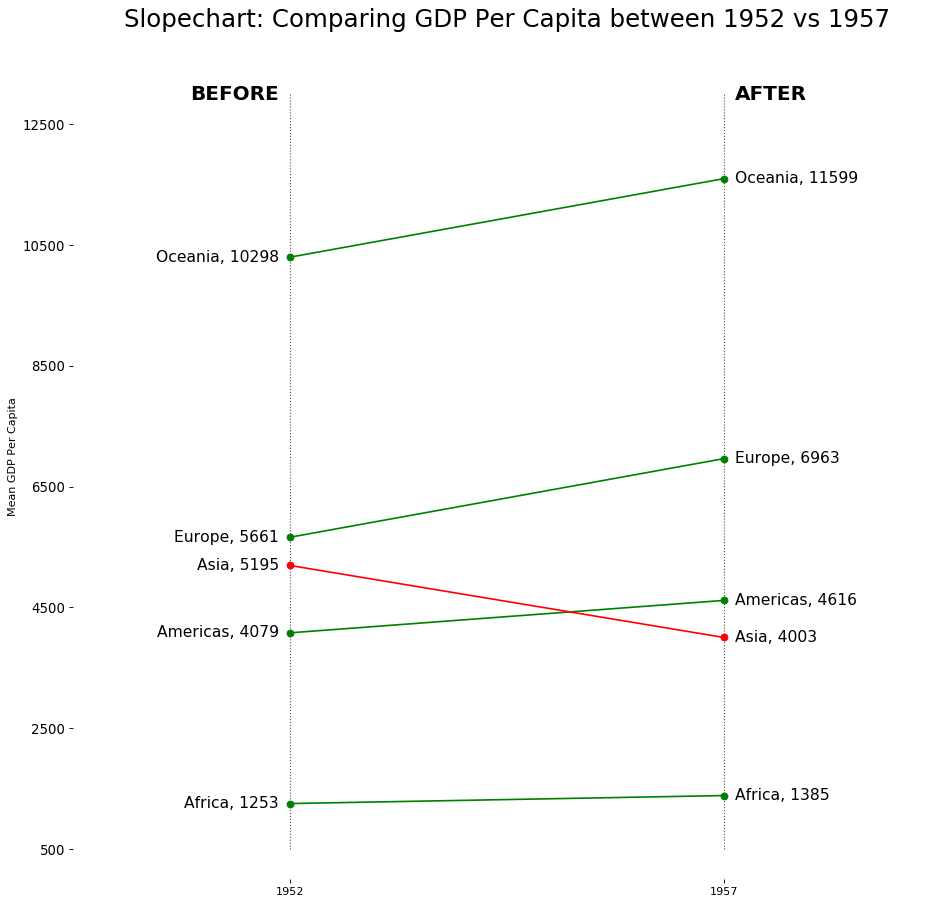

In [23]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

## 哑铃图 （Dumbbell Plot）

Text(0.5, 1.0, 'Dumbell Chart: Pct Change - 2013 vs 2014')

[(-1, 27), Text(0, 0.5, 'Mean GDP Per Capita'), (0, 0.25)]

[Text(0, 0, '5%'), Text(0, 0, '15%'), Text(0, 0, '20%'), Text(0, 0, '25%')]

[Text(0, 0, '5%'), Text(0, 0, '15%'), Text(0, 0, '20%'), Text(0, 0, '25%')]

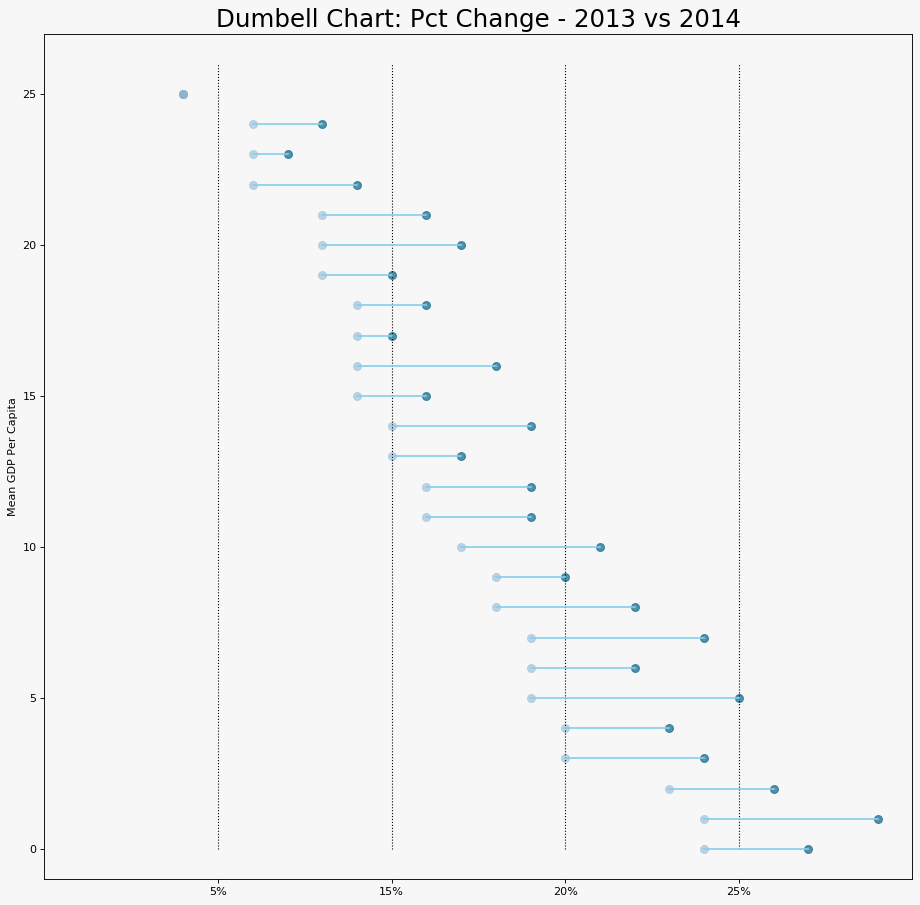

In [24]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()

# 分布 （Distribution）

## 连续变量的直方图 （Histogram for Continuous Variable）

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


<Figure size 1280x720 with 0 Axes>

Text(0.5, 1.0, 'Stacked Histogram of $displ$ colored by $class$')

Text(0.5, 0, 'displ')

Text(0, 0.5, 'Frequency')

(0, 25)

([<matplotlib.axis.XTick at 0x1964a32f3c8>,
 <a list of 11 Text xticklabel objects>)

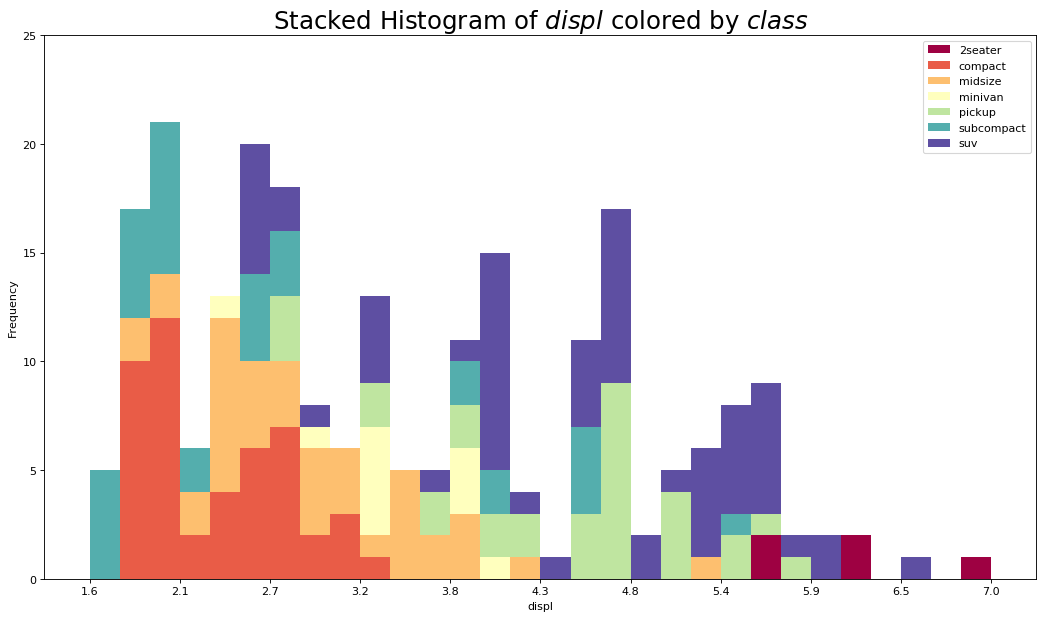

In [26]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df[:3]

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])

## 类型变量的直方图 （Histogram for Categorical Variable）

<Figure size 1280x720 with 0 Axes>

Text(0.5, 1.0, 'Stacked Histogram of $manufacturer$ colored by $class$')

Text(0.5, 0, 'manufacturer')

Text(0, 0.5, 'Frequency')

(0, 40)

([<matplotlib.axis.XTick at 0x1964d105648>,
 <a list of 15 Text xticklabel objects>)

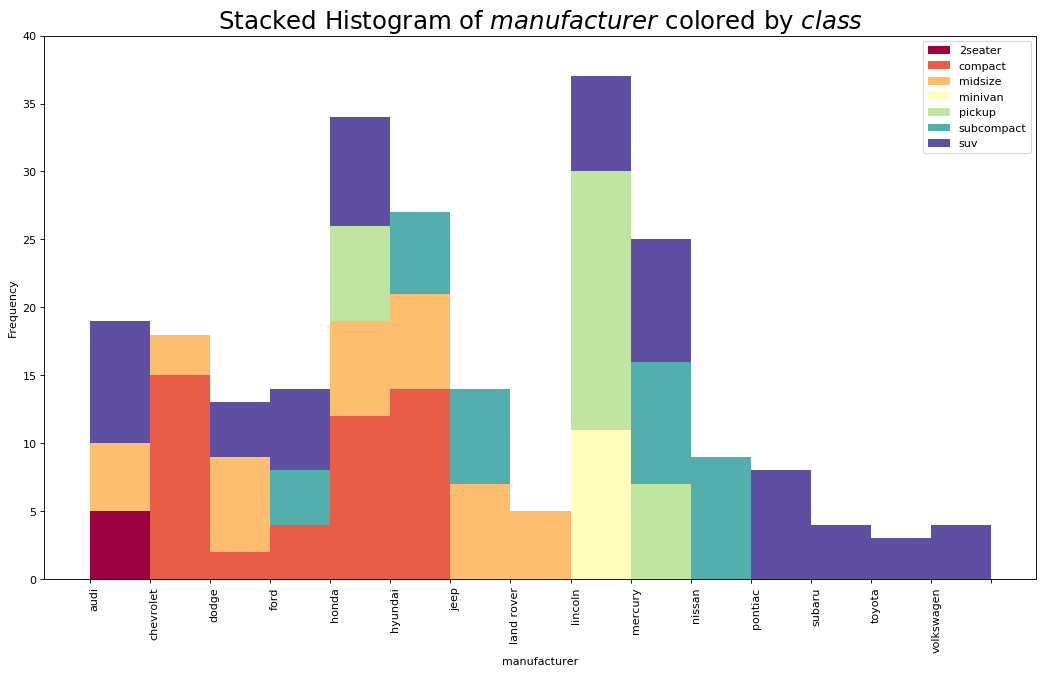

In [29]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')

## 密度图 （Density Plot）

<Figure size 1280x800 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of City Mileage by n_Cylinders')

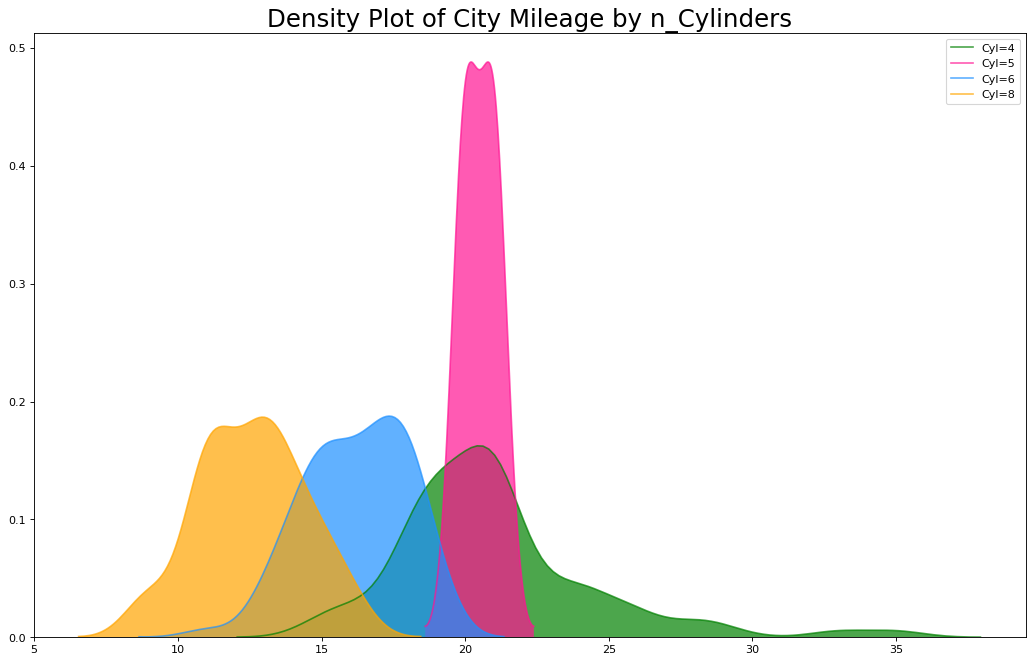

In [35]:
import seaborn as sns
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()

## 直方密度线图 （Density Curves with Histogram）

<Figure size 1040x800 with 0 Axes>

(0, 0.35)

Text(0.5, 1.0, 'Density Plot of City Mileage by Vehicle Type')

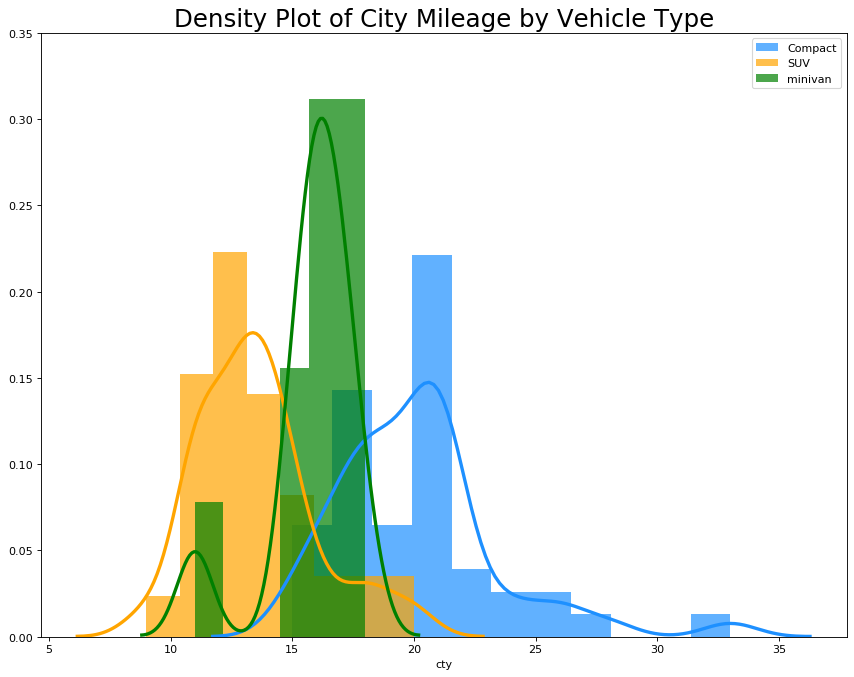

In [36]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()

## Joy Plot

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


<Figure size 1280x800 with 0 Axes>

Text(0.5, 1, 'Joy Plot of City and Highway Mileage by Class')

<Figure size 1280x800 with 0 Axes>

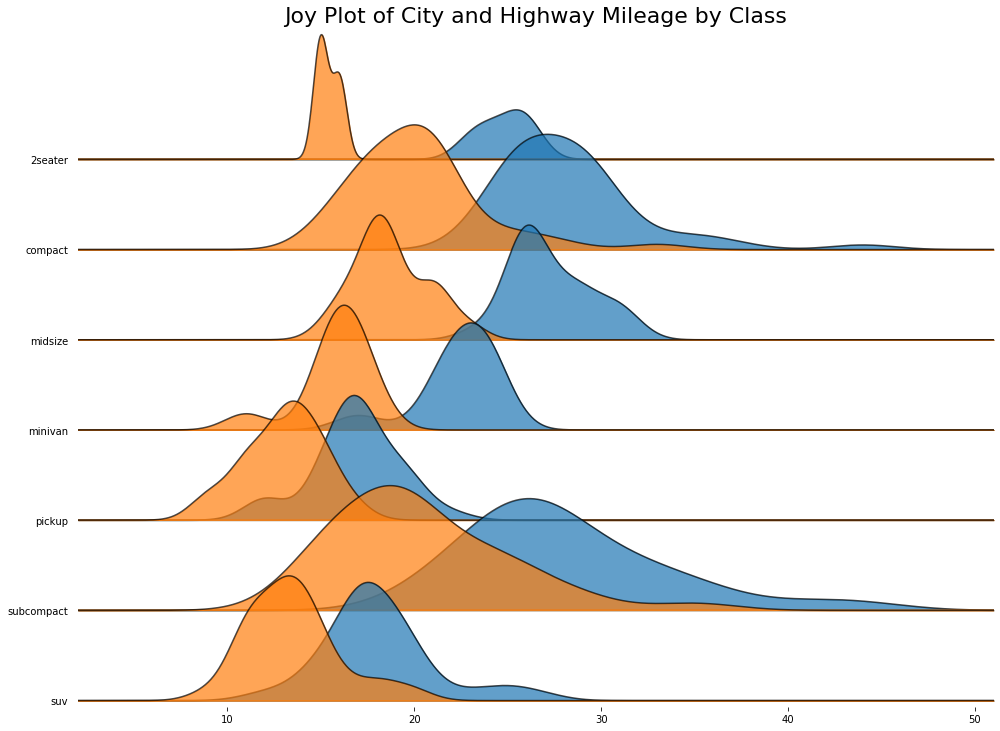

In [41]:
# !pip install joypy
import joypy

# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
mpg[:3]

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10), alpha=0.7)

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)

## 分布式包点图 （Distributed Dot Plot）

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cyl_color
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,tab:red
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,tab:red
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,tab:red


Text(33, 13, '$red \\; dots \\; are \\; the \\: median$')

Text(0.5, 1.0, 'Distribution of City Mileage by Make')

Text(0.5, 0, 'Miles Per Gallon (City)')

[Text(0, 0, 'Honda'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Pontiac'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Mercury'),
 Text(0, 0, 'Dodge'),
 Text(0, 0, 'Land Rover'),
 Text(0, 0, 'Lincoln')]

(1, 40)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text xticklabel objects>)

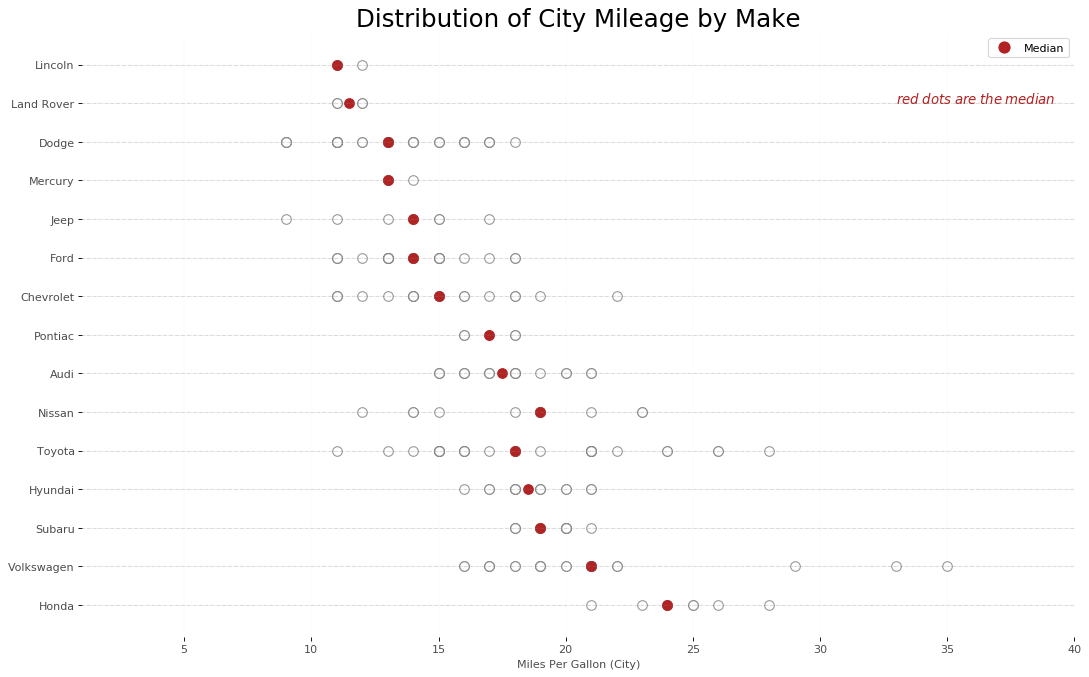

In [70]:
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)
df_raw[:3]

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
# df[:3]
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())
# df_median[:3]

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=list(np.repeat(i, df_make.shape[0])), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.8)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)

## 箱形图 （Box Plot）

<Figure size 1040x800 with 0 Axes>

Text(0.5, 1.0, 'Box Plot of Highway Mileage by Vehicle Class')

(10, 40)

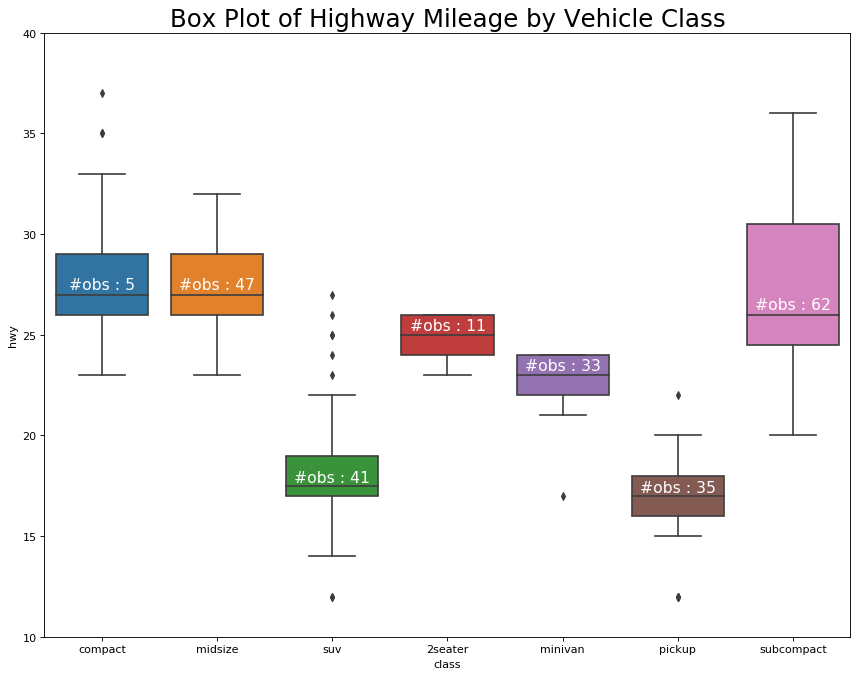

In [72]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)

## 包点+箱形图 （Dot + Box Plot）

<Figure size 1040x800 with 0 Axes>

Text(0.5, 1.0, 'Box Plot of Highway Mileage by Vehicle Class')

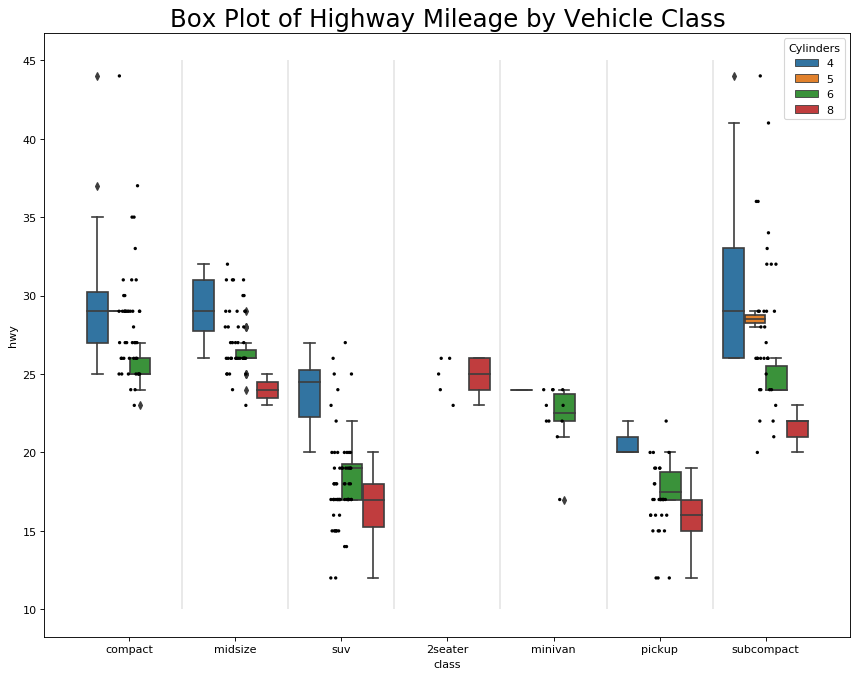

In [73]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')

## 小提琴图 （Violin Plot）

<Figure size 1040x800 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot of Highway Mileage by Vehicle Class')

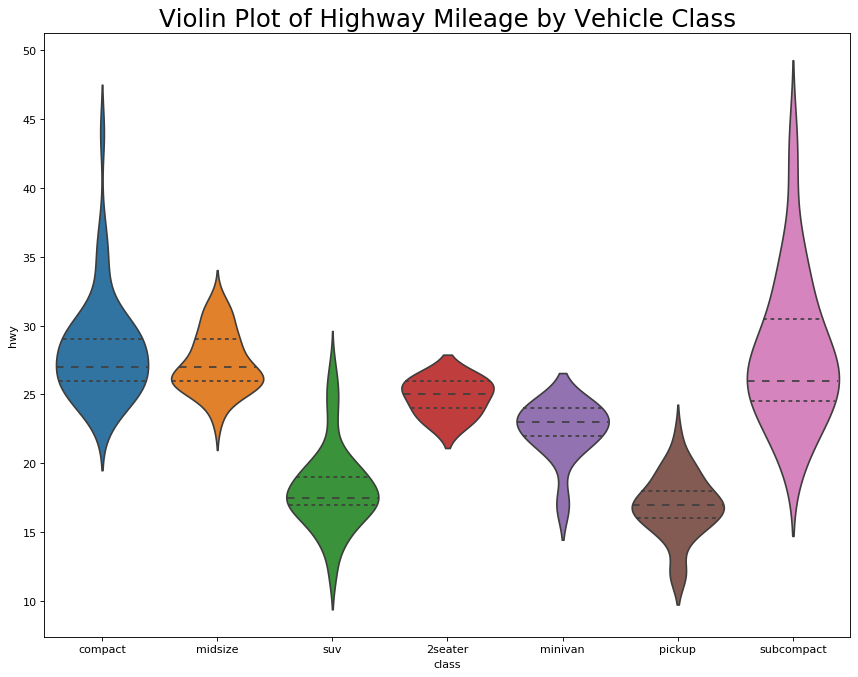

In [74]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)

## 人口金字塔 （Population Pyramid）

<Figure size 1040x800 with 0 Axes>

Text(0.5, 0, '$Users$')

Text(0, 0.5, 'Stage of Purchase')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text yticklabel objects>)

Text(0.5, 1.0, 'Population Pyramid of the Marketing Funnel')

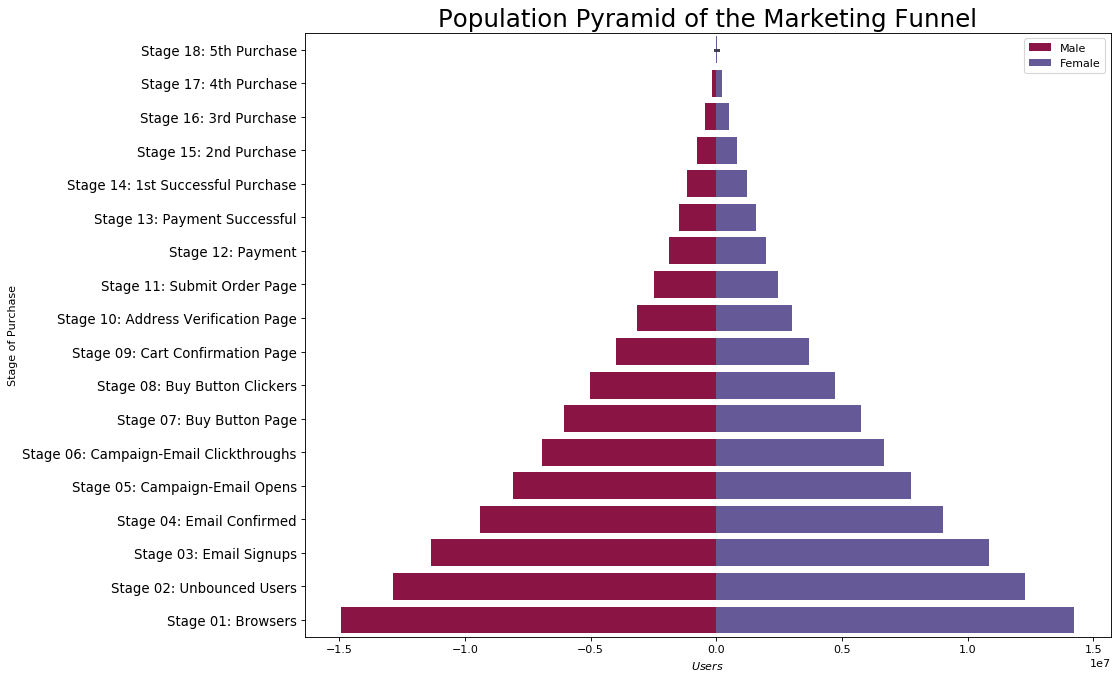

In [92]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")
# df

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    data = df.loc[df[group_col]==group, :]
#     data
    sns.barplot(x='Users', y='Stage', data=data, order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()

## 分类图 （Categorical Plots）

Text(0.5, 0.98, 'sf')

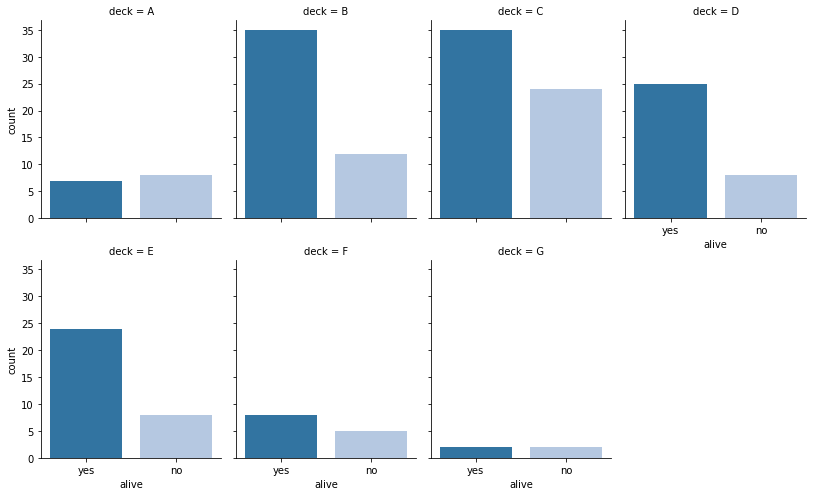

In [95]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')

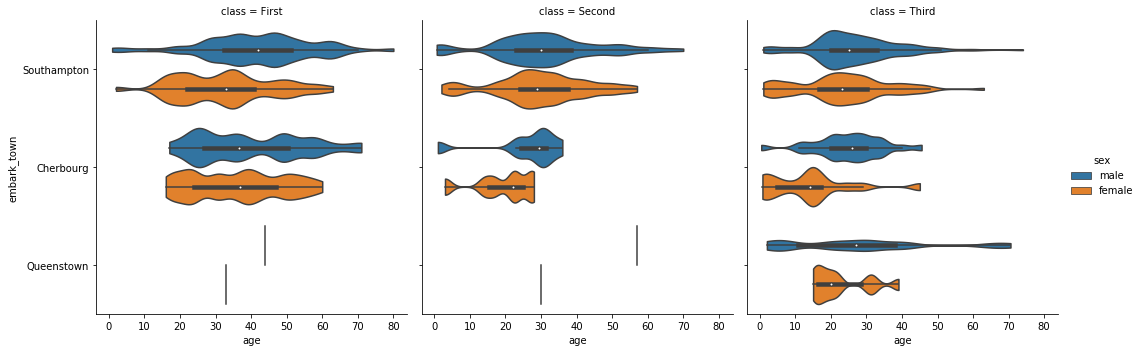

In [98]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)